In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('weblogs.csv')
df.head()

df = df.drop(['NIGHT', 'ID'], axis=1)
df = df.drop('OTHER_METHOD', axis=1)

X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

numeric_cols = X.select_dtypes(['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
tree.fit(X_train, y_train)

print("Best parameters: {}".format(tree.best_params_))
print("Best accuracy: {}".format(tree.best_score_))

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best accuracy: 0.9693026936919678


In [7]:
from sklearn.metrics import accuracy_score

best_clf = tree.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9683022789696385


In [8]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10785
           1       0.91      0.94      0.92      2686

    accuracy                           0.97     13471
   macro avg       0.95      0.96      0.95     13471
weighted avg       0.97      0.97      0.97     13471



In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10529   256]
 [  171  2515]]


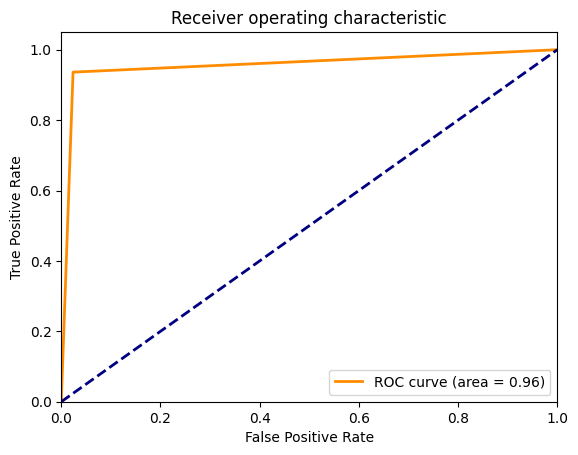

AUC:  0.9562999443188483


In [11]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC: ", roc_auc)

In [12]:
# save the model to disk
import pickle
filename = './modellen/decision_tree_classifier_final.sav'
pickle.dump(best_clf, open(filename, 'wb'))